# key words
- sampling: np.random.choice
- model selection: cross_val_score
- regressor: GaussianProcessRegressor, predict with para 'return_std'
- matplot: plot, scatter, errorbar

List of scores: [ -3.0237096   -4.53533257  -3.6717493  -10.96259927]
Mean of scores: -5.548347687167356
Std of scores: 3.1715823673026144
List of scores: [ -2.62288448  -4.54054522  -3.8583325  -11.57345499]
Mean of scores: -5.648804296217493
Std of scores: 3.4889720550085035
List of scores: [ -2.58847975  -4.53944002  -3.8602763  -10.1832449 ]
Mean of scores: -5.292860243475222
Std of scores: 2.909015070478179


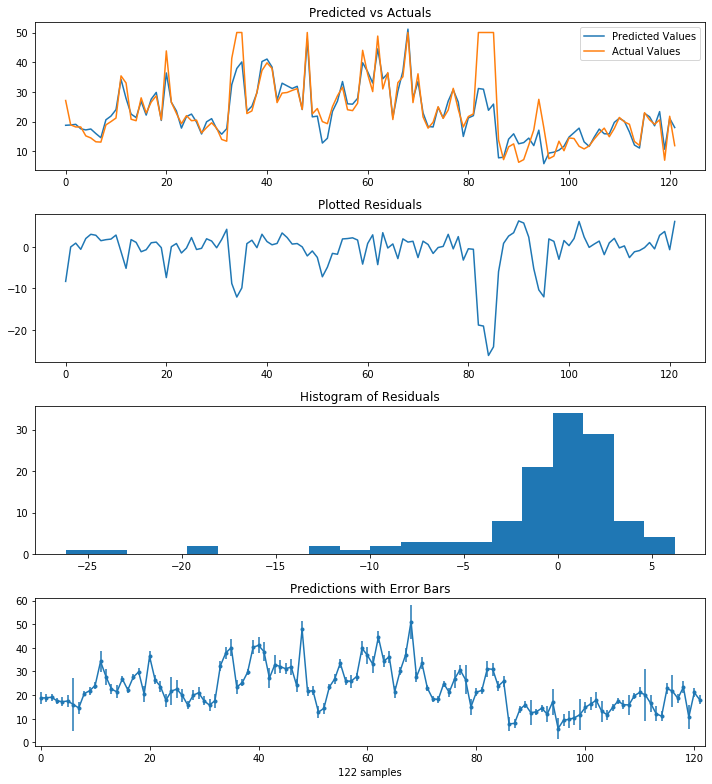

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn.model_selection import cross_val_score

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK

def score_mini_report(scores_list):
    print("List of scores:", scores_list)
    print("Mean of scores:", scores_list.mean())
    print("Std of scores:", scores_list.std())

boston = datasets.load_boston()
X = boston.data
y = boston.target
train_set = np.random.choice([True, False], len(y), p=[.75, .25])
X_train, X_test = X[train_set], X[~train_set]
y_train, y_test = y[train_set], y[~train_set]

# cross validation
mixed_kernel = CK(1.0, (1e-4, 1e4)) * RBF(10, (1e-4, 1e4))
gpr_5 = GaussianProcessRegressor(alpha=5, n_restarts_optimizer=20, kernel=mixed_kernel)
scores_5 = cross_val_score(gpr_5, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
score_mini_report(scores_5)

gpr_7 = GaussianProcessRegressor(alpha=7, n_restarts_optimizer=20, kernel=mixed_kernel)
scores_7 = cross_val_score(gpr_7, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
score_mini_report(scores_7)

gpr_7n = GaussianProcessRegressor(alpha=7, n_restarts_optimizer=20, kernel=mixed_kernel, normalize_y=True)
scores_7n = cross_val_score(gpr_7n, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
score_mini_report(scores_7n)

# plot sample redisuals
gpr_7n.fit(X_train, y_train)
y_pred, MSE = gpr_7n.predict(X_test, return_std=True)

plt.figure(figsize=(10, 11), tight_layout=True)

plt.subplot(4, 1, 1, title="Predicted vs Actuals")
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.plot(range(len(y_pred)), y_test, label='Actual Values')
plt.legend(loc='best')

plt.subplot(4, 1, 2, title="Plotted Residuals")
plt.plot(range(len(y_pred)), y_pred - y_test)

plt.subplot(4, 1, 3, title="Histogram of Residuals")
plt.hist(y_pred - y_test, bins=20)

plt.subplot(4, 1, 4, title="Predictions with Error Bars", xlim=(-1, len(y_pred)), xlabel="%d samples" % len(y_pred))
plt.scatter(range(len(y_pred)), y_pred, marker='.')
plt.errorbar(range(len(y_pred)), y_pred, yerr=1.96 * MSE, linestyle='-')

plt.show()